## Rejection sampling using the module "sampler" in pyACC
**This notebook is similar to the first part of *Rejection_sampling.ipynb*, the only difference is the fact that in order to find the samples to approximate the target distribution, the function *Rejection_Sampling* is used.**

In [1]:
import sys
sys.path.append("../../")
from pyACC.sampler import Rejection_Sampling

import numpy as np
import matplotlib.pyplot as plt

- **Definition of the *target distribution* and of the *proposal distribution***
- **Plot of the target and proposal distributions in a specific range of x values**

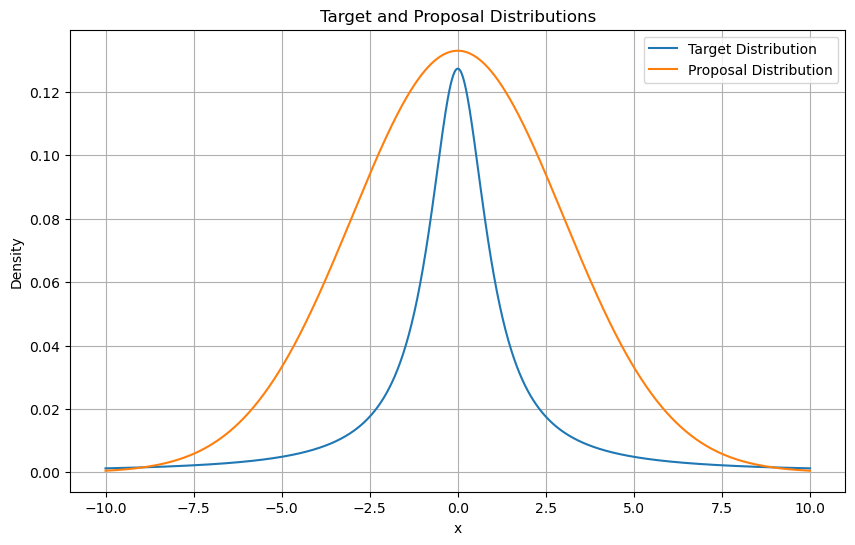

In [2]:
#target distribution (PDF)
def target_distribution(x):
    #return np.exp(-x**2/2) / np.sqrt(2*np.pi)
    return 0.4 / (np.pi * (1 + x**2))

#proposal distribution (PDF)
def proposal_distribution(x,mu=0,sigma=3):
    #return np.exp(-abs(x))
    return 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-0.5 * ((x - mu) / sigma)**2)

#range of x values
x_values=np.linspace(-10, 10, 1000) #(-3,3,1000)

#plot of the target and proposal distributions
plt.figure(figsize=(10,6))
plt.plot(x_values,target_distribution(x_values),label='Target Distribution')
plt.plot(x_values,proposal_distribution(x_values),label='Proposal Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Target and Proposal Distributions')
plt.legend()
plt.grid(True)
plt.show()

**Rejection algorithm**

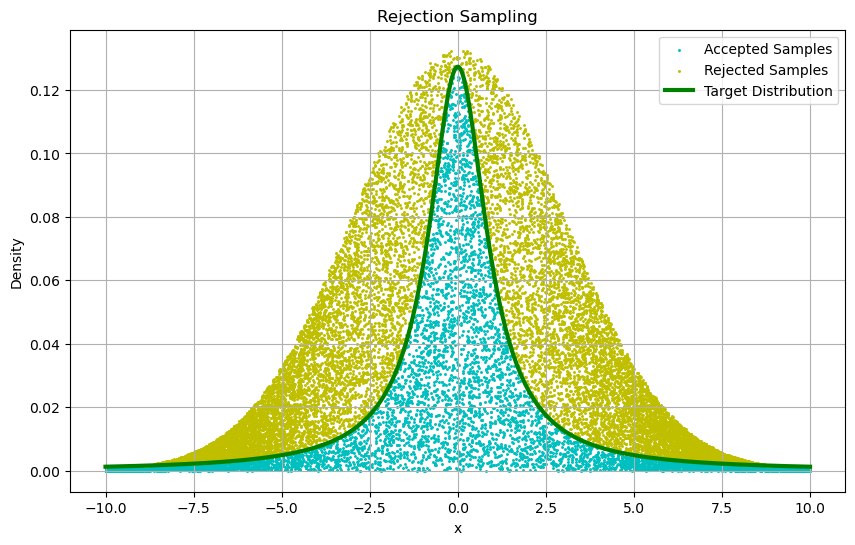

In [3]:
#maximum of the target distribution, used as the upper bound for the proposal distribution
M=max(target_distribution(x_values))

#arrays with accepted values
X=[]
Y=[]
#arrays with rejected values
X_rej=[]
Y_rej=[]

n_samples=10000

#using the "sampler" module in pyACC
sample=Rejection_Sampling(n_samples,target_distribution,proposal_distribution,1,X,Y,X_rej,Y_rej)

#plot of the generated samples along with the target distribution
plt.figure(figsize=(10,6))
plt.scatter(X,Y,marker='.',color='c',s=5,label='Accepted Samples')
plt.scatter(X_rej,Y_rej,marker='.',color='y',s=5,label='Rejected Samples')
plt.plot(x_values,target_distribution(x_values),color='g',linewidth=3,label='Target Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Rejection Sampling')
plt.legend()
plt.grid(True)
plt.show()

Test of the *efficiency*, computed as the number of accepted points over the total number of generated points.

In [4]:
efficiency=len(Y)/(len(Y)+len(Y_rej))
print("The efficiency is",efficiency)

The efficiency is 0.41179377367814196
